<a href="https://colab.research.google.com/github/HecVelaz/Inteligencia_Artificial/blob/main/Trabajo_ventas_de_tienda/IA_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ESTUDIANTES: MATHIAS AGUILAR-4970804 Y HECTOR VELAZQUEZ-5011166



En una cadena minorista con tiendas en varias regiones. La empresa le ha proporcionado un conjunto de datos que contiene datos de ventas del último año. Este conjunto de datos incluye información como la fecha de venta, el ID del producto, la ubicación de la tienda, el número de artículos vendidos y el importe de las ventas. Su tarea consiste en analizar este conjunto de datos para obtener información que pueda ayudar en los procesos de toma de decisiones, como la gestión de inventarios, las estrategias de ventas y la comprensión de las preferencias de los clientes.

Estructura del dataset: archivo sales_data.csv


*   Date: La fecha de la venta (YYYY-MM-DD).
*   Product_ID: El ID del producto vendido.
*   Store_Location: La ubicación de la tienda donde se produjo la venta.
*   Units_Sold: El número de unidades vendidas en la transacción.
*   Sales_Amount: El importe total de ventas de la transacción.



In [ ]:
import numpy as np

In [ ]:
import pandas as pd

**[1] Cargar el conjunto de datos en un DataFrame.**

In [ ]:
df=pd.read_csv('/content/sample_data/sales_data.csv')

**[2] Imprima las primeras filas del conjunto de datos para entender su estructura.**


In [ ]:
print(df.head())

         Date  Product_ID Store_Location  Units_Sold  Sales_Amount
0  2023-01-21        1003           West           0       4033.98
1  2023-02-24        1003           East          39        122.70
2  2023-01-06        1055          South          27       1734.15
3  2023-04-02        1024           East          36       2051.03
4  2023-03-22        1066          South          29       2733.24


**[3] Compruebe y resuma cualquier valor faltante o NaN en cada columna.**

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            100 non-null    object 
 1   Product_ID      100 non-null    int64  
 2   Store_Location  96 non-null     object 
 3   Units_Sold      100 non-null    int64  
 4   Sales_Amount    100 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB


Date              0
Product_ID        0
Store_Location    4
Units_Sold        0
Sales_Amount      0
dtype: int64

**[4] Rellene los valores 0 en Units_Sold con el valor medio de los items.**


In [ ]:
df_copy=df.copy()
df_copy.loc[:,"Units_Sold"].replace(to_replace=0,value=df_copy["Units_Sold"].mean(),inplace=True)

**[5] Elimine las filas en Sales_Amount que sea negativo o Store_Location falte.**


In [ ]:
df_copy=df_copy.loc[df_copy["Sales_Amount"]>=0].copy()
df_copy.dropna(axis=0,subset="Store_Location",inplace=True)

**[6] Añada una nueva columna Sale_Price_Per_Unit dividiendo Sales_Amount por Units_Sold.**

In [ ]:
df_copy["Sales_Price_Per_Unit"]=df_copy["Sales_Amount"]/df_copy["Units_Sold"]
df_copy.head()

,Date,Product_ID,Store_Location,Units_Sold,Sales_Amount,Sales_Price_Per_Unit
0,2023-01-21,1003,West,24.56,4033.98,164.250000
1,2023-02-24,1003,East,39.00,122.70,3.146154
2,2023-01-06,1055,South,27.00,1734.15,64.227778
3,2023-04-02,1024,East,36.00,2051.03,56.973056
4,2023-03-22,1066,South,29.00,2733.24,94.249655


**[7] Convertir la columna Date a un objeto DateTime en pandas.**

In [ ]:
df_copy["Date"]=pd.to_datetime(df["Date"])

**[8] Agregue los datos para encontrar el total de Units_Sold y el Sales_Amount por Store_Location.**


In [ ]:
total_byStoreLocation=df.groupby("Store_Location").agg({"Units_Sold":"sum","Sales_Amount":"sum"})
print(total_byStoreLocation)

                Units_Sold  Sales_Amount
Store_Location                          
East                   668      41346.76
North                  680      38733.57
South                  463      31368.79
West                   523      56619.20


**[9] Agrupe los datos por mes y calcule las ventas totales de cada mes para identificar tendencias a lo largo del tiempo.**

In [ ]:
df_copy.resample("M", on="Date").agg({"Sales_Amount": "sum"})

,Sales_Amount
Date,
2023-01-31,52579.14
2023-02-28,46416.88
2023-03-31,74185.82
2023-04-30,17752.88


**[10] Identifique los 5 productos más vendidos (por Units_Sold).**


In [ ]:
df_copy.groupby('Product_ID')['Units_Sold'].sum().sort_values(ascending=False).head()

Product_ID
1085    143.56
1055    111.00
1025     88.00
1024     84.00
1066     75.00
Name: Units_Sold, dtype: float64

**[11] Escribir una función Python para calcular la varianza de ventas de cada producto.**


In [ ]:
def varianza(data):
 return df_copy.groupby('Product_ID')['Sales_Amount'].var()
varianza_ventas_por_producto = varianza(df_copy)

**[1] Generar un histograma de Sales_Amount para visualizar la distribución de los valores de ventas.**


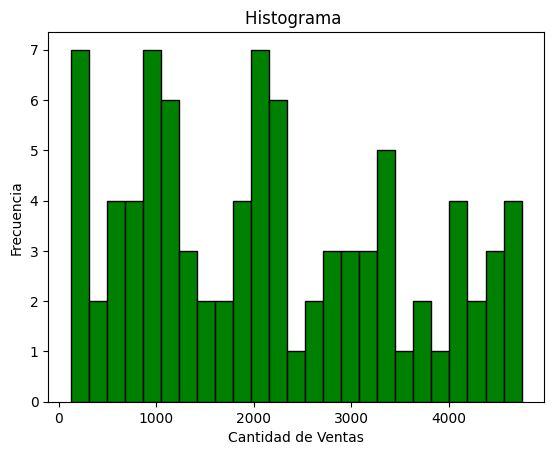

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_copy['Sales_Amount'], bins=25, color='green', edgecolor='black')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Frecuencia')
plt.title('Histograma ')
plt.show()

**[2] Crear un gráfico de líneas que muestre las tendencias de ventas mensuales.**

<ipython-input-180-e37161ec34ad>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = df_copy.resample('M').sum()


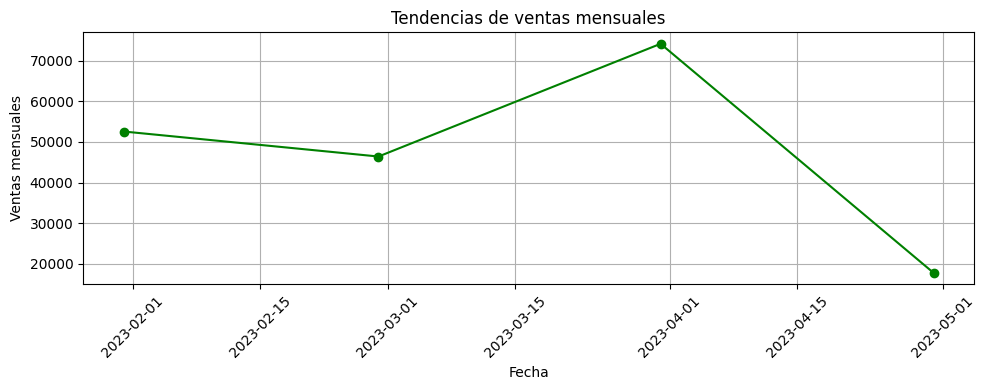

In [ ]:
# Convertir la columna "Date" a tipo de datos de fecha
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

# Configurar la columna "Date" como el índice del DataFrame
df_copy.set_index('Date', inplace=True)

# Agrupar los datos por mes y sumar las ventas mensuales
monthly_sales = df_copy.resample('M').sum()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales.index, monthly_sales['Sales_Amount'], marker='o', color='green', linestyle='-')

# Agregar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Ventas mensuales')
plt.title('Tendencias de ventas mensuales')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

**[1] Crear una matriz en base a Product_ID, Units_Sold y Sales_Amount.**

In [ ]:
import numpy as np
matriz = np.column_stack((df_copy['Product_ID'], df_copy['Units_Sold'], df_copy['Sales_Amount']))
# Imprimir la matriz resultante
matriz

array([[1.00300e+03, 2.45600e+01, 4.03398e+03],
       [1.00300e+03, 3.90000e+01, 1.22700e+02],
       [1.05500e+03, 2.70000e+01, 1.73415e+03],
       [1.02400e+03, 3.60000e+01, 2.05103e+03],
       [1.06600e+03, 2.90000e+01, 2.73324e+03],
       [1.09500e+03, 3.80000e+01, 4.60729e+03],
       [1.02600e+03, 3.70000e+01, 1.80007e+03],
       [1.09200e+03, 2.70000e+01, 3.71376e+03],
       [1.03100e+03, 3.30000e+01, 2.31587e+03],
       [1.04900e+03, 4.00000e+00, 1.20056e+03],
       [1.06000e+03, 2.20000e+01, 2.31695e+03],
       [1.05000e+03, 2.00000e+00, 7.90200e+02],
       [1.01800e+03, 2.45600e+01, 9.64300e+02],
       [1.02000e+03, 5.00000e+00, 2.54200e+03],
       [1.00400e+03, 1.00000e+01, 2.15273e+03],
       [1.08100e+03, 3.30000e+01, 4.58274e+03],
       [1.09100e+03, 3.80000e+01, 1.87573e+03],
       [1.06000e+03, 3.10000e+01, 3.19810e+03],
       [1.02100e+03, 4.70000e+01, 1.64160e+02],
       [1.02000e+03, 3.60000e+01, 3.35133e+03],
       [1.06900e+03, 4.50000e+01, 9.7238

**[2] Extraer como vector 1D el Product_ID y filtrar los ID duplicados.**

In [ ]:
Id_products = df_copy['Product_ID'].values
# Filtro ID duplicados
ids_unicos = np.unique(Id_products)
# Imprimir los ID únicos
print("Product_ID únicos:")
ids_unicos

Product_ID únicos:


array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1009, 1011, 1012,
       1013, 1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026,
       1027, 1031, 1033, 1037, 1038, 1039, 1041, 1043, 1046, 1047, 1048,
       1049, 1050, 1051, 1055, 1056, 1058, 1060, 1062, 1063, 1066, 1067,
       1069, 1072, 1073, 1077, 1078, 1080, 1081, 1083, 1085, 1086, 1087,
       1088, 1089, 1091, 1092, 1093, 1095, 1098])

**[2] Calcule la media, la mediana y la desviación estándar de Sales_Amount para comprender la distribución de las ventas.**

In [ ]:
#En SAles_Amount columna se hace:
#calculo de la media
Media = np.mean(df_copy['Sales_Amount'])
# Calculo de la Mediana
Mediana= np.median(df_copy['Sales_Amount'])
# Calcular la desviación estándar de Sales_Amount
Desviacion_estandard = np.std(df_copy['Sales_Amount'])
print("Media de Sales_Amount:",Media)
print("Mediana de Sales_Amount:", Mediana)
print("Desviación estándar de Sales_Amount:", Desviacion_estandard)

Media de Sales_Amount: 2169.712727272727
Mediana de Sales_Amount: 2083.27
Desviación estándar de Sales_Amount: 1345.8575865534478


**[3] Normalice Sales_Amount de modo que oscilen exactamente entre 0 y 1 para comparar el rendimiento de las ventas entre productos de diferentes escalas.**

In [ ]:
# Normalización entre 0 y 1
min = df_copy['Sales_Amount'].min()
max = df_copy['Sales_Amount'].max()
## df = (Columna-min)/(max-min)
df_copy['Sales_Amount_Normalized'] = (df_copy['Sales_Amount'] - min) / (max - min)
df_copy.reset_index(inplace=True) ## ésta linea sirve para que "Date" referencia de la columna de las fechas
# no se salte una fila
df_copy

,Date,Product_ID,Store_Location,Units_Sold,Sales_Amount,Sales_Price_Per_Unit,Sales_Amount_Normalized
0,2023-01-21,1003,West,24.56,4033.98,164.250000,0.845733
1,2023-02-24,1003,East,39.00,122.70,3.146154,0.000000
2,2023-01-06,1055,South,27.00,1734.15,64.227778,0.348443
3,2023-04-02,1024,East,36.00,2051.03,56.973056,0.416961
4,2023-03-22,1066,South,29.00,2733.24,94.249655,0.564475
...,...,...,...,...,...,...,...
83,2023-01-23,1033,South,40.00,2106.12,52.653000,0.428874
84,2023-02-24,1007,South,15.00,2805.03,187.002000,0.579998
85,2023-03-21,1039,West,24.56,2237.02,91.083876,0.457178
86,2023-03-16,1041,North,9.00,4747.42,527.491111,1.000000


**[4] Encontrar el ID de producto con la mayor frecuencia de ventas para centrarse en la optimización de su inventario.**


In [ ]:
Mas_vendido= df_copy['Product_ID'].value_counts().idxmax()
# Imprimir el ID de producto más vendido
print("ID de producto con la mayor frecuencia de ventas:", Mas_vendido)

ID de producto con la mayor frecuencia de ventas: 1055


**[5] Ordene el conjunto de datos en función del importe de las ventas en orden descendente para dar prioridad a las transacciones de alto valor para su posterior análisis.**


In [ ]:
df_copy_ordenado= df_copy.sort_values(by='Sales_Amount', ascending=False)
# Imprimir el conjunto de datos ordenado
print("Conjunto de datos ordenado en función del importe de las ventas en orden descendente:")
df_copy_ordenado

Conjunto de datos ordenado en función del importe de las ventas en orden descendente:


,Date,Product_ID,Store_Location,Units_Sold,Sales_Amount,Sales_Price_Per_Unit,Sales_Amount_Normalized
86,2023-03-16,1041,North,9.00,4747.42,527.491111,1.000000
41,2023-03-26,1051,East,23.00,4735.97,205.911739,0.997524
5,2023-03-10,1095,West,38.00,4607.29,121.244474,0.969700
15,2023-01-17,1081,North,33.00,4582.74,138.870909,0.964391
27,2023-01-26,1026,East,2.00,4500.47,2250.235000,0.946602
...,...,...,...,...,...,...,...
72,2023-03-15,1043,East,22.00,230.01,10.455000,0.023204
46,2023-02-07,1013,South,24.56,224.39,9.136401,0.021988
18,2023-01-01,1021,East,47.00,164.16,3.492766,0.008965
69,2023-01-10,1016,East,14.00,163.71,11.693571,0.008868


**[6] Asegúrese de que todos los números de coma flotante del informe tengan un formato con dos decimales para garantizar la coherencia.**


In [ ]:
df_copy_redondeado = df_copy_ordenado.round(2)
#Se redondea todos los numeros decimales a 2 decimales de df_ordenado que es dataframe anterior
# y se guarda en un nuevo df_redondeado
print("Informe con números de coma flotante formateados con dos decimales:")
df_copy_redondeado

Informe con números de coma flotante formateados con dos decimales:


,Date,Product_ID,Store_Location,Units_Sold,Sales_Amount,Sales_Price_Per_Unit,Sales_Amount_Normalized
86,2023-03-16,1041,North,9.00,4747.42,527.49,1.00
41,2023-03-26,1051,East,23.00,4735.97,205.91,1.00
5,2023-03-10,1095,West,38.00,4607.29,121.24,0.97
15,2023-01-17,1081,North,33.00,4582.74,138.87,0.96
27,2023-01-26,1026,East,2.00,4500.47,2250.24,0.95
...,...,...,...,...,...,...,...
72,2023-03-15,1043,East,22.00,230.01,10.46,0.02
46,2023-02-07,1013,South,24.56,224.39,9.14,0.02
18,2023-01-01,1021,East,47.00,164.16,3.49,0.01
69,2023-01-10,1016,East,14.00,163.71,11.69,0.01
